# Using Random forest to classify galaxies

The galaxy catalogue we are using is a sample of galaxies from the Galaxy Zoo Project where at least 20 human classifiers have come to a consensus on the galaxy type.

Examples of spiral and elliptical galaxies were selected where there was a unanimous classification. Due to low sample numbers, we included merger examples where at least 80% of human classifiers selected the merger class.

The features that we will be using to do our galaxy classification are colour index, adaptive moments, eccentricities and concentrations. These features are provided as part of the SDSS catalogue.

Colour indices are the same colours (u-g, g-r, r-i, and i-z) we used for regression. Studies of galaxy evolution tell us that spiral galaxies have younger star populations and therefore are 'bluer' (brighter at lower wavelengths). Elliptical galaxies have an older star population and are brighter at higher wavelengths ('redder').

Eccentricity approximates the shape of the galaxy by fitting an ellipse to its profile. Eccentricity is the ratio of the two axis (semi-major and semi-minor). The De Vaucouleurs model was used to attain these two axis. To simplify our experiments, we will use the median eccentricity across the 5 filters.

Adaptive moments also describe the shape of a galaxy. They are used in image analysis to detect similar objects at different sizes and orientations. We use the fourth moment here for each band.

Concentration is similar to the luminosity profile of the galaxy, which measures what proportion of a galaxy's total light is emitted within what radius. A simplified way to represent this is to take the ratio of the radii containing 50% and 90% of the Petrosian flux.

The Petrosian method allows us to compare the radial profiles of galaxies at different distances. If you are interested, you can read more here on the need for Petrosian approach.

For these experiments, we will define concentration as:<br>
$\mbox{conc} = \frac{\mbox{petro}_{R50}}{\mbox{petro}_{R90}}$
<br>We will use the concentration from the u, r and z bands.

In [1]:
#import libraries
import numpy as np
import itertools
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from support_functions import plot_confusion_matrix, generate_features_targets

#generaing features of training data
def generate_features_targets(data):
    output_targets = np.empty(shape=(len(data)), dtype='<U20')
    output_targets[:] = data['class']

    input_features = np.empty(shape=(len(data), 13))
    input_features[:, 0] = data['u-g']
    input_features[:, 1] = data['g-r']
    input_features[:, 2] = data['r-i']
    input_features[:, 3] = data['i-z']
    input_features[:, 4] = data['ecc']
    input_features[:, 5] = data['m4_u']
    input_features[:, 6] = data['m4_g']
    input_features[:, 7] = data['m4_r']
    input_features[:, 8] = data['m4_i']
    input_features[:, 9] = data['m4_z']
    input_features[:, 10] = data['petroR50_u'] / data['petroR90_u']
    input_features[:, 11] = data['petroR50_r'] / data['petroR90_r']
    input_features[:, 12] = data['petroR50_z'] / data['petroR90_z']

    return input_features, output_targets

#helper function to find accuracy
def calculate_accuracy(predicted_classes, actual_classes, ):
    return sum(actual_classes[:] == predicted_classes[:]) / len(actual_classes)

# helper fucntion for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')

Accuracy score: 0.8666666666666667
Confusion matrix, without normalization
[[247  12   1]
 [ 14 213  33]
 [  2  42 216]]


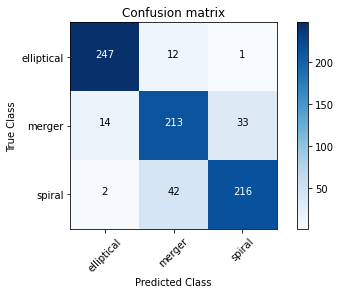

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier


# complete this function to get predictions from a random forest classifier
def rf_predict_actual(data, n_estimators):
  # generate the features and targets
  features, targets = generate_features_targets(data)

  # instantiate a random forest classifier
  rfc = RandomForestClassifier(n_estimators=n_estimators)
  
  # get predictions using 10-fold cross validation with cross_val_predict
  predicted = cross_val_predict(rfc, features, targets, cv=10)

  # return the predictions and their actual classes
  return predicted, targets

if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  # get the predicted and actual classes
  number_estimators = 50              # Number of trees
  predicted, actual = rf_predict_actual(data, number_estimators)

  # calculate the model score using your function
  accuracy = calculate_accuracy(predicted, actual)
  print("Accuracy score:", accuracy)

  # calculate the models confusion matrix using sklearns confusion_matrix function
  class_labels = list(set(actual))
  model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

  # plot the confusion matrix using the provided functions.
  plt.figure()
  plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
  plt.show()